Hospitality industry is one of the most challenging sector. There are thousands of restaurants all over Bengaluru but only a few stand apart.
Let's suppose you need to open up a restaurant.There a lot of factor that determine the success of the restaurant.Factors like the locality,cost,cuisine etc. 
Let's analyse the factors that matter the most and also the factors that one should be cautious before opening a restaurent.

We will be analysing various parameters such as:
- What restaurants are most common
- Does tha rating of restaurant depend on location
- Does the restaurant offering  of cuisines are better than restaurants offering single cuisine
- Does the same restaurant rating differ with respesct to location


In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


Let's load the dataset.

In [2]:
df = pd.read_csv("zomato.csv")
df.head(2)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


We almost have fifty thousand rows. These restaurants are enough to give us insights about the factors influencing the success of a restaurent. 
Here a good rating is considered as a parameter to judge the success of the restaurent. But before proceeding we have to remove the duplicates.

In [3]:
df.drop_duplicates(keep=False, inplace=True)

Let's see the columns that are present in the dataset.

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

So there are some columns present which aren't necessary for our analysis such as url,phone number etc.

In [5]:
df.drop(columns=['url','phone','address','menu_item'],inplace=True)

Let's check for missing values before proceeding with analysis.

In [6]:
#since plotly doesn't have countplot, we will creating a table of value counts.
def plotcount(df, col_name):
    df1 = pd.DataFrame(df[col_name].value_counts())
    df1 = df1.reset_index()
    df1.columns = [col_name, 'counts']
    return df1


In [7]:
missing=pd.DataFrame(df.isnull().sum())
missing=missing.reset_index()
px.bar(data_frame=missing, x='index', y=0, text=0)




As you can see in the dish_liked column about 28078 values are missing. That's about 50 percent of data.This attribute is specific to particular restaurant and hence won't help us with analysis. So we are gonna remove that column as it does not make sense to fill those values.

In [8]:
df.drop(columns=['dish_liked'],inplace=True)

Before starting, let's look at the various restaurants in Banglore.

In [9]:
len(df['name'].value_counts())

8792

There are almost 8800 unique restaurants in Banglore.Let's look at the top 10 most restaurant with highest presence.

In [10]:
name_count=plotcount(df, 'name')
px.bar(data_frame=name_count[:10], x='name', y='counts', text='counts')


As we can see there are a lot of fastfood chains in Banglore. Since it is a IT hub, fast food chains are usually common.

In [11]:
df['rate'].isnull().sum()

7775

There are 7775 restaurants whose rating is not avaiable. We won't be deleting these because we need to understand the distribution of restaurants across Banglore.

There are some restaurent whose rating is 'NEW'.These are the restaurants that were just listed on zomato. We will be converting them to nan and process them later.

In [12]:
for val in range(len(df)):
    if (df['rate'][val] == '-' or df['rate'][val] == 'NEW' or pd.isna(df['rate'][val])):
        df['rate'][val]=np.nan
    else:
        df['rate'][val]=df['rate'][val][:3]
  




So let's check the distribution of online delivery service by the restaurants. 

In [13]:
fig = px.pie(df, names='online_order', title='Online order')
fig.show()


As we see 58% of the restaurant provide with online delivery.Now we need to check if online delivery has any influence on rating of the restaurant.

In [14]:
df['rate']=df['rate'].astype('float')

In [15]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [16]:

fig = px.bar(df, x=df.groupby(by=['online_order'])['rate'].mean().index, y=df.groupby(by=['online_order'])['rate'].mean().values,title='Online order vs rating')
fig.show()


As you see the restaurants who provide online delivery are slightly better(approx 0.1) than restaurants who do not provide online delivery.

Now let's check which localities have most restaurants.

In [17]:
df['location'].nunique()

93

There are a total of 93 unique locations in out dataframe. 

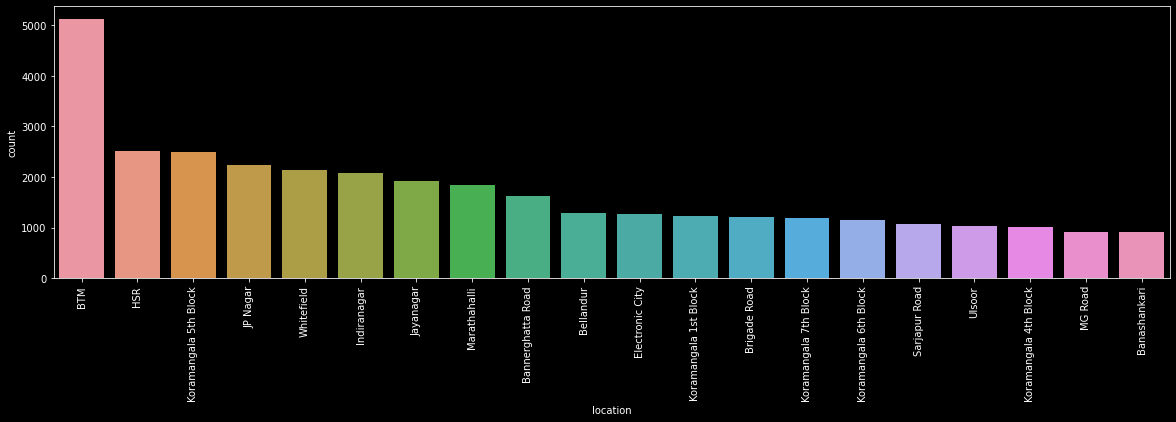

In [18]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 5))
chart = sns.countplot(df['location'], order=pd.value_counts(df['location']).iloc[:20].index, orient="v",ax=ax)
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


As we can see BTM has the highest number of restaurants (a little over 5000). So should we think of opening restaurant over there? Well let's analyse further.

Let's check the the type of restaurants at various locations.

In [19]:
df.groupby(['location'])['rest_type'].value_counts()


location     rest_type                
BTM          Quick Bites                  2733
             Casual Dining                 711
             Takeaway, Delivery            334
             Cafe                          291
             Delivery                      254
                                          ... 
Yeshwantpur  Food Court                      2
             Quick Bites, Sweet Shop         2
             Food Court, Beverage Shop       1
             Food Court, Quick Bites         1
             Sweet Shop                      1
Name: rest_type, Length: 1422, dtype: int64

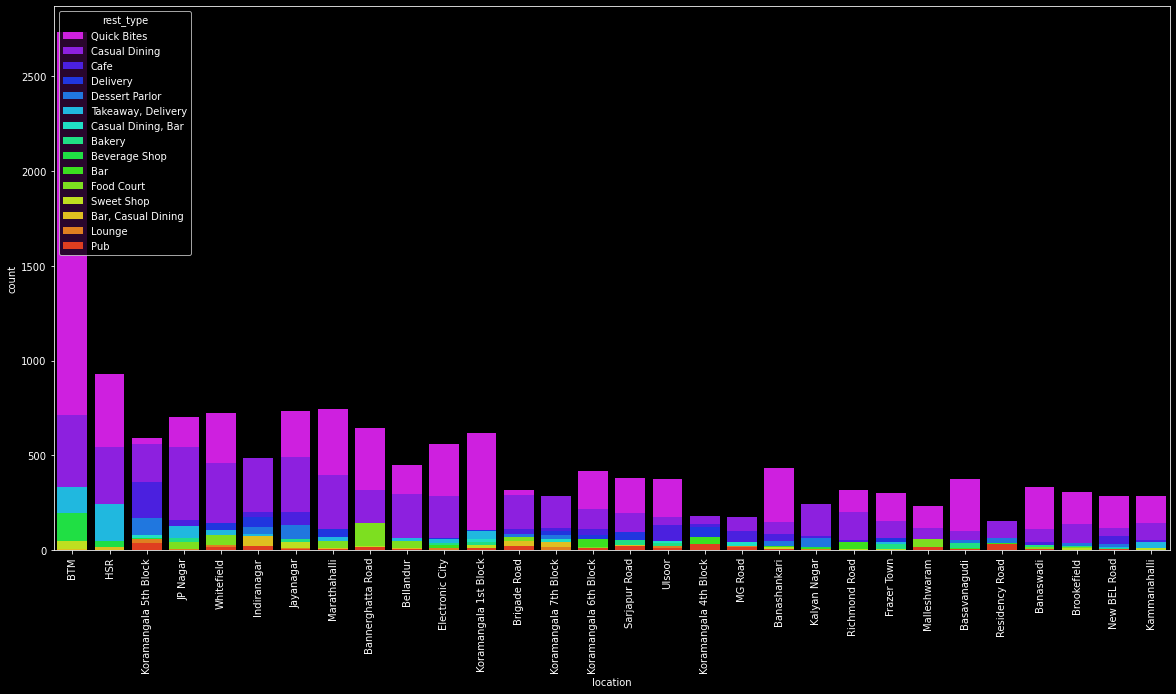

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))

chart = sns.countplot(df['location'], hue=df['rest_type'], order=pd.value_counts(
    df['location']).iloc[:30].index, hue_order=pd.value_counts(df['rest_type']).iloc[:15].index, dodge=False, palette='gist_rainbow_r')
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# chart.legend("upper right")

So after analysing the top 20 locations with top 20 restaurant types, we can see that almost all the locations have a majority of quick bite restaurant followed by casual dining.

Now what is the distribution of cost with respect to the restaurant type?Before proceeding we to do a little bit of processing to the cost attribute.


In [21]:
def cost(x):
    if pd.isna(x):
        pass
    else:
        return "".join(x.split(','))


df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(cost)


In [22]:


def convert(x):
    if pd.isna(x):
        pass
    else:
        return int(x)



df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(convert)
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(),inplace=True)

In [23]:
df.dropna(inplace=True)

In [24]:
mean_approx_cost=df.groupby(['rest_type'])['approx_cost(for two people)'].mean()

In [26]:
df["rest_type"]

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51466, dtype: object

In [25]:
fig = px.bar(df, x=df.groupby(by=['rest_type'])['approx_cost(for two people)'].mean().index, y=df.groupby(by=['rest_type'])['approx_cost(for two people)'].mean().values,
             title="Cost w.r.t. restaurant type")
fig.show()


The most expensive type of restaurant is Fine Dining and MicroBrewery.The most common type of restaurant i.e. Quick Bites costs around three hundered ruppees for 2 people.

Let's check if there is any relation between cuisines and cost too.

In [31]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"[North Indian, Mughlai, Chinese]",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"[Chinese, North Indian, Thai]",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","[Cafe, Mexican, Italian]",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"[South Indian, North Indian]",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"[North Indian, Rajasthani]",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,[Continental],1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.700449,0,Whitefield,Bar,[Finger Food],600.0,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700449,0,Whitefield,Bar,[Finger Food],2000.0,[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,[Finger Food],2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [44]:
df1=df.copy()
df1.reset_index(drop=True,inplace=True)

Let's check the the type of cuisines offered to understand the preference of people in various cities.

In [29]:
df['cuisines'] = df['cuisines'].apply(
    lambda x: x.split(','))


In [35]:
df1['cuisines'].nunique()

2712

In [46]:
l=[]
for i in range(len(df1['cuisines'])):
    for j in df1['cuisines'][i]:
        l.append(j)



In [51]:
lp=set(l)
lp=list(lp)

In [66]:
df1

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"[North Indian, Mughlai, Chinese]",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"[Chinese, North Indian, Thai]",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","[Cafe, Mexican, Italian]",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"[South Indian, North Indian]",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"[North Indian, Rajasthani]",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51461,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,[Continental],1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51462,Vinod Bar And Restaurant,No,No,3.700449,0,Whitefield,Bar,[Finger Food],600.0,[],Pubs and bars,Whitefield
51463,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700449,0,Whitefield,Bar,[Finger Food],2000.0,[],Pubs and bars,Whitefield
51464,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,[Finger Food],2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [72]:
# fig, ax = plt.subplots(figsize=(20, 10))

# chart = sns.countplot(df1['location'], hue=df1['cuisines'], order=pd.value_counts(
#     df1['location']).iloc[:30].index, hue_order=pd.value_counts(df1['cuisines']).iloc[:15].index, dodge=False, palette="Set3")
# x = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# # chart.legend("upper right")


As we can see the most popular cuisine offered at top 15 locations are chinese and north indian.